In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
csv2015_path = "Happiness Data/2015.csv"
csv2016_path = "Happiness Data/2016.csv"
csv2017_path = "Happiness Data/2017.csv"
csv2018_path = "Happiness Data/2018.csv"
csv2019_path = "Happiness Data/2019.csv"
csv2020_path = "Happiness Data/2020.csv"
csv2021_path = "Happiness Data/2021.csv"
csv2022_path = "Happiness Data/2022.csv"

time2020_path = "Happiness Data/TimeSeries2020.csv"
time2021_path = "Happiness Data/TimeSeries2021.csv"
time2022_path = "Happiness Data/TimeSeries2022.csv"

csv2015df = pd.read_csv(csv2015_path)
csv2016df = pd.read_csv(csv2016_path)
csv2017df = pd.read_csv(csv2017_path)
csv2018df = pd.read_csv(csv2018_path)
csv2019df = pd.read_csv(csv2019_path)
csv2020df = pd.read_csv(csv2020_path)
csv2021df = pd.read_csv(csv2021_path)
csv2022df = pd.read_csv(csv2022_path)

time2020df = pd.read_csv(time2020_path)
time2021df = pd.read_csv(time2021_path)
time2022df = pd.read_csv(time2022_path)

In [3]:
csv2022df.head()

,RANK,Country name,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"


In [4]:
csv2015df.head(15)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [5]:
#combine happiness and covid datasets for 2020, 2021, 2022
merged_data_2020 = pd.merge(csv2020df, time2020df, how='left', on = ['Country name'])
merged_data_2021 = pd.merge(csv2021df, time2021df, how='left', on = ['Country name'])
merged_data_2022 = pd.merge(csv2022df, time2022df, how='left', on = ['Country name'])

In [ ]:
random_country_list = ['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Findland', 'Netherlands', 'Sweden', 'New Zealand',
                  'Australia', 'Chad', 'Guinea', 'Ivory Coast', 'Burkina Faso', 'Afghanistan', 'Rwanda', 'Benin', 'Syria',
                  'Burundi', 'Togo']

In [6]:
#Drop 
duplicate_ID_20 = merged_data_2020.loc[merged_data_2020.duplicated(subset=["Country name"]), 'Country name'].unique()
duplicate_ID_20

array(['Denmark', 'Netherlands', 'New Zealand', 'Canada', 'Australia',
       'United Kingdom', 'France', 'China'], dtype=object)

In [7]:
duplicate_ID_21 = merged_data_2021.loc[merged_data_2021.duplicated(subset=["Country name"]), 'Country name'].unique()
duplicate_ID_21

array(['Denmark', 'Netherlands', 'New Zealand', 'Australia', 'Canada',
       'United Kingdom', 'France', 'China'], dtype=object)

In [8]:
duplicate_ID_22 = merged_data_2022.loc[merged_data_2022.duplicated(subset=["Country name"]), 'Country name'].unique()
duplicate_ID_22

array(['Denmark', 'Netherlands', 'New Zealand', 'Australia', 'Canada',
       'United Kingdom', 'France', 'China'], dtype=object)

Text(0, 0.5, 'Total Covid Deaths')

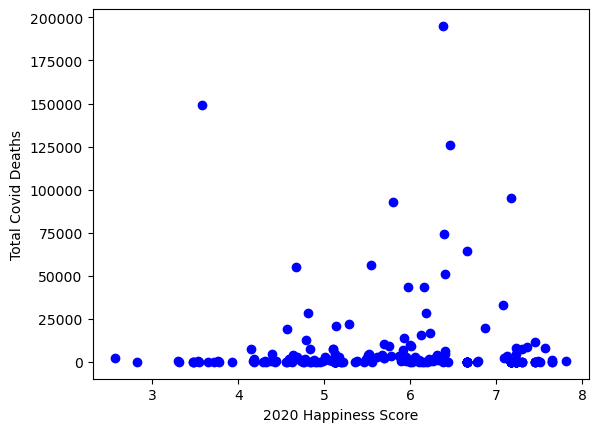

In [9]:
marker_size=10
plt.scatter(merged_data_2020["Ladder score"],merged_data_2020["12/31/2020"], marker="o", facecolors="blue")
plt.xlabel("2020 Happiness Score")
plt.ylabel("Total Covid Deaths")

Text(0, 0.5, 'Total Covid Deaths')

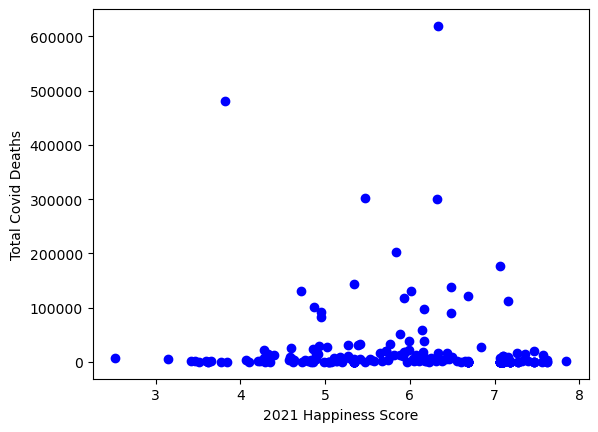

In [10]:
marker_size=10
plt.scatter(merged_data_2021["Ladder score"],merged_data_2021["12/31/2021"], marker="o", facecolors="blue")
plt.xlabel("2021 Happiness Score")
plt.ylabel("Total Covid Deaths")

Text(0, 0.5, '2015 Life Expectancy')

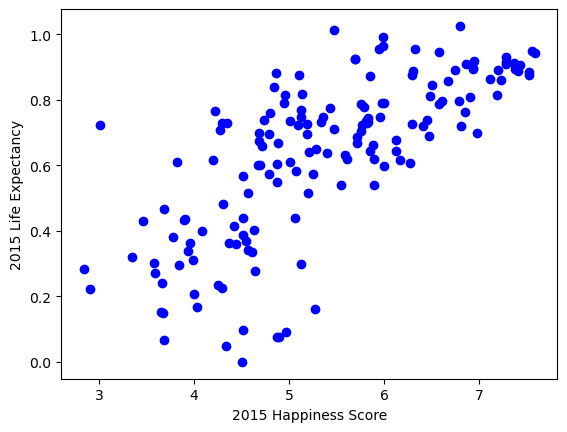

In [11]:
marker_size=10
plt.scatter(csv2015df["Happiness Score"],csv2015df["Health (Life Expectancy)"], marker="o", facecolors="blue")
plt.xlabel("2015 Happiness Score")
plt.ylabel("2015 Life Expectancy")